<h1>Gráfica de barreras de potencial para diferentes tiempos de tunelamiento

Los potenciales sugeridos son 
<h3>Barrea de potencial cuadrada.</h3>
Este se describe mediante la ecuación:

$$
V(x) = 
\begin{cases} 
V_0, & \text{si } |x| \leq \frac{a}{2}; 0 & \text{si } |x| > \frac{a}{2}\\
\end{cases}
$$

In [1]:
#Se importa la librería de matplotlib para graficar las barreras de potencial y los próximos resultaods
import matplotlib.pyplot as plt
import numpy as np # Librería para crear las listas de datos y para hacer cálculos

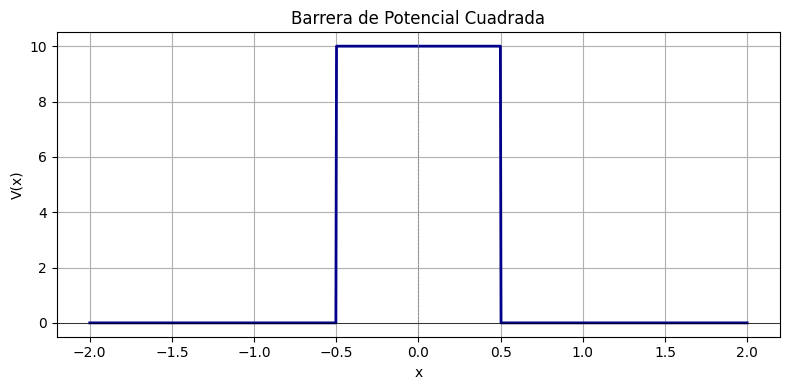

In [2]:
# Parámetros de la barrera
V0 = 10  # altura de la barrera (eV)
a = 1    # ancho de la barrera (nm)

# Dominio en x
x = np.linspace(-2*a, 2*a, 1000)

# Definición del potencial
V = np.where(np.abs(x) < a/2, V0, 0)

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(x, V, color='darkblue', lw=2)
plt.title('Barrera de Potencial Cuadrada')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()

Figura 1: Representación de la barrera de potencial  cuadrada

La expresión de tiempo de permanencia o dwell time derivada en los anexos para el potencial rectangular es:

$$
\tau_d = \frac{m}{\hbar \kappa} \cdot \frac{k}{\sinh^{2}(\kappa L) (\kappa^2 + k^2)^2+(2\kappa k)^2} Q
$$

donde $k = \sqrt{2mE}/\hbar$, $\kappa = \sqrt{2m(V_0 - E)}/\hbar$ y $Q = \sinh(2\kappa L)(\kappa^2 + k^2)^2 + 2\kappa L (\kappa^2 - k^2)$

Adicionalmente, podemos determinar una relación entre el tiempo de permanencia y el tiempo de transmisión y de reflexión mediante:

$$
j_i = j_t + |j_r|
$$

Al dividir estas corrientes entre la probabilidad de encontrar la partícula en la barrera llegamos a:

$$
\frac{1}{\tau_d} = \frac{1}{\tau_t} + \frac{1}{\tau_r}
$$

Esta relación igualmente satisface:

$$
\tau_d = T \tau_t = R \tau_r
$$

Donde T es el coficiente de transmisión y satisface:

$$
T = \frac{1}{1 + \frac{k_0^4 \sinh^2(\kappa L)}{4k^2 \kappa^2}}
$$

Teniendo en cuenta que $k_0^2 = \kappa^2 + k^2$.

Por lo que las expresiones de tiempo de transmisión y reflexión son:

$$
\tau_t = \frac{m}{\hbar} \cdot \frac{1}{4k\kappa^3}Q
$$

$$
\tau_r = \frac{m}{\hbar \kappa} \cdot \frac{k}{(\kappa^2 + k^2)^2 \sinh^2(\kappa L)}Q
$$

Se expresarán los resultados en términos de unidades de $k_0^{-1}$ para el ancho de la barrera y $\tau_0$ para las definiciones de tiempo, donde $k_0^2 = k^2 + \kappa^2$ y $\tau_0 = \hbar/2V_0$.

Primero, obtenemos resultados del tiempo de permanencia para una energía fija E, variando el ancho de la barrera L

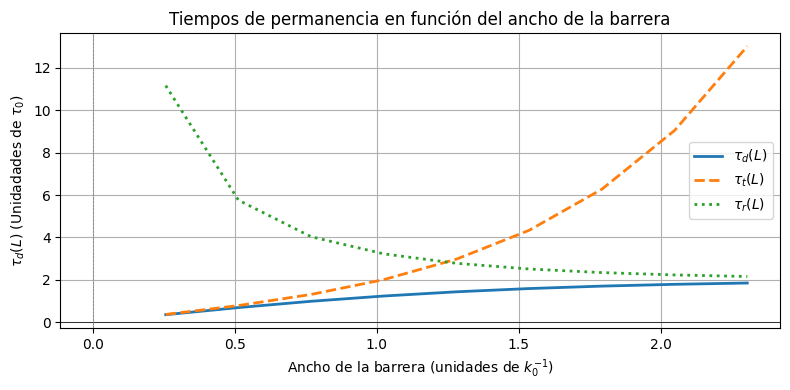

In [12]:
# Se definen las constantes

m = 511000         # Masa del electrón (eV)
hbar = 197.3    #Constante de Planck reducida (eV nm)
V0 = 1  # altura de la barrera (eV)
E = 0.5*V0 # energía de la partícula incidente (eV)

# Se definen los parámetros para determinar el tiempo de permanencia
k = np.sqrt(2*m*E)/hbar
kappa = np.sqrt(2*m*(V0 - E))/hbar

tau_0 = hbar / (2*V0) #Tiempo característico para determinar las unidades de tiempos de tunelaje
k0 = np.sqrt(k**2 + kappa**2) #Utilizado para medir la unidades del ancho de barrera

Q = lambda L: np.sinh(2*kappa*L)*(k**2 + kappa**2) + 2*kappa*L*(kappa**2 - k**2)
tau_d = lambda L: m/(hbar * kappa) * k/((k**2 + kappa**2)**2 * np.sinh(kappa*L)**2 + (2*k*kappa)**2) * Q(L) # dwell time

tau_t = lambda L: m/hbar * 1/(4*k*kappa**3)*Q(L) #tau_t

tau_r = lambda L: m/(hbar * kappa) * k/((k**2 + kappa**2)**2 * np.sinh(kappa*L)**2) * Q(L) #tau_r

L = np.arange(0.05, 0.5, 0.05) #Lista de anchos de barrera (nm)

dwell_times = tau_d(L) # Lista de resultados de tiempos de permanencia

t_t = tau_t(L) # Lista de resultados de tau_t

t_r = tau_r(L) # Lista de resultaods de tau_r

#Se grafican los resultados en función del ancho de la barrera 
plt.figure(figsize=(8, 4))
plt.plot(L*k0, dwell_times/tau_0, linestyle = '-', label = r"$\tau_d(L)$", lw=2) # Gráfica de tau_d
plt.plot(L*k0, t_t/tau_0, linestyle = '--',label = r"$\tau_t(L)$", lw=2) # Gráfica de tau_t
plt.plot(L*k0, t_r/tau_0, linestyle = ':',label = r"$\tau_r(L)$", lw=2) # Gráfica de tau_r

plt.title('Tiempos de permanencia en función del ancho de la barrera')
plt.xlabel(r'Ancho de la barrera (unidades de $k_0^{-1}$)')
plt.ylabel(r'$\tau_d(L)$ (Unidadades de $\tau_0$)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()

Figura 2: Tiempos de tunelaje (en unidades de $\tau_0$) contra el ancho de barrera L de una barrera de potencial rectangular (en unidades de $k_0^{-1}$) para una energía fija $E = 0.5V0$ (en unidades de $V_0$). El tiempo de permanencia $\tau_d$ es la línea sólida, el tiempo de refelxión $\tau_r$ es la línea punteada y el tiempo de transmisión $\tau_t$ es la línea discontinua.

Por otro lado, si calculamos los resultados para un ancho de barrera fija variando E obtenemos el siguiente resultado:

/var/folders/g1/w5yw4p6j1px2v4zkj98bgnhm0000gp/T/ipykernel_1272/447462666.py:16: RuntimeWarning: divide by zero encountered in divide
  tau_t = lambda E: m/hbar * 1/(4*k(E)*kappa(E)**3)*Q(E) #tau_t


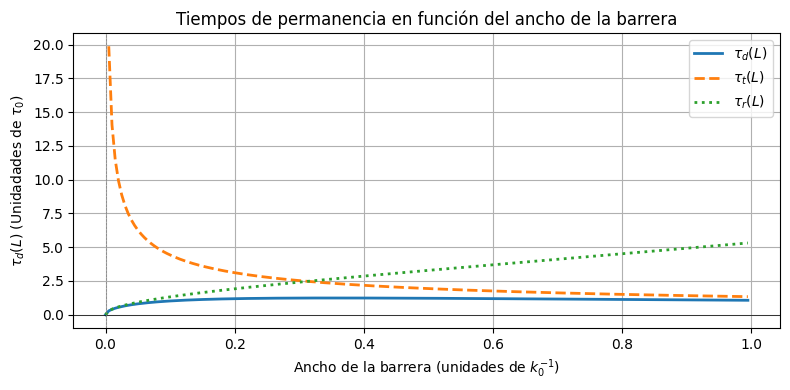

In [14]:
#Las constantes se definieron previamente
V0 = 0.2 #eV

# Se definen los parámetros para determinar el tiempo de permanencia
k = lambda E: np.sqrt(2*m*E)/hbar
kappa = lambda E: np.sqrt(2*m*(V0 - E))/hbar

tau_0 = hbar / (2*V0) #Tiempo característico para determinar las unidades de tiempos de tunelaje
k0 = np.sqrt(k(E)**2 + kappa(E)**2) #Utilizado para medir la unidades del ancho de barrera

L = 1 / k0 #L es 1 en unidades de k0^-1

Q = lambda E: np.sinh(2*kappa(E)*L)*(k(E)**2 + kappa(E)**2) + 2*kappa(E)*L*(kappa(E)**2 - k(E)**2)
tau_d = lambda E: m/(hbar * kappa(E)) * k(E)/((k(E)**2 + kappa(E)**2)**2 * np.sinh(kappa(E)*L)**2 + (2*k(E)*kappa(E))**2) * Q(E) # dwell time

tau_t = lambda E: m/hbar * 1/(4*k(E)*kappa(E)**3)*Q(E) #tau_t

tau_r = lambda E: m/(hbar * kappa(E)) * k(E)/((k(E)**2 + kappa(E)**2)**2 * np.sinh(kappa(E)*L)**2) * Q(E) #tau_r


E = np.arange(0, V0, 1e-3) # Lista de valores de energía

dwell_times = tau_d(E) # Lista de resultados de tiempos de permanencia

t_t = tau_t(E) # Lista de resultados de tau_t

t_r = tau_r(E) # Lista de resultaods de tau_r

#Se grafican los resultados en función del ancho de la barrera 
plt.figure(figsize=(8, 4))
plt.plot(E/V0, dwell_times/tau_0, linestyle = '-', label = r"$\tau_d(L)$", lw=2) # Gráfica de tau_d
plt.plot(E/V0, t_t/tau_0, linestyle = '--',label = r"$\tau_t(L)$", lw=2) # Gráfica de tau_t
plt.plot(E/V0, t_r/tau_0, linestyle = ':',label = r"$\tau_r(L)$", lw=2) # Gráfica de tau_r

plt.title('Tiempos de permanencia en función del ancho de la barrera')
plt.xlabel(r'Ancho de la barrera (unidades de $k_0^{-1}$)')
plt.ylabel(r'$\tau_d(L)$ (Unidadades de $\tau_0$)')
plt.legend()
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()

Figura 3. Tiempos de tunelamiento $\tau$ (en unidades de $\tau_0$) contra energía (en unidades de $V_0$) para una barrera de potencial rectangular con ancho de barrera fijo L = 1 (en unidades de $k_0^{-1}$). El tiempo de permanencia $\tau_d$ es la línea sólida, el tiempo de reflexión $\tau_r$ es la línea punteada y el tiempo de transmisión $\tau_t$ es la línea discontinua.

<h3>Barrera de potencial parabólica</h3>
Se conoce también como la fórmula de Hill-Wheeler [1] y se caracteriza por el potencial definido como

$$
V(x) = 
\begin{cases} 
V_0 - \frac{1}{2}m\Omega^2 x^2, & \text{si } |x| \leq \sqrt{\frac{2V0}{m\Omega^2}} &  \\
0, & \text{si } |x| > \sqrt{\frac{2V0}{m\Omega^2}}\
\end{cases}
$$

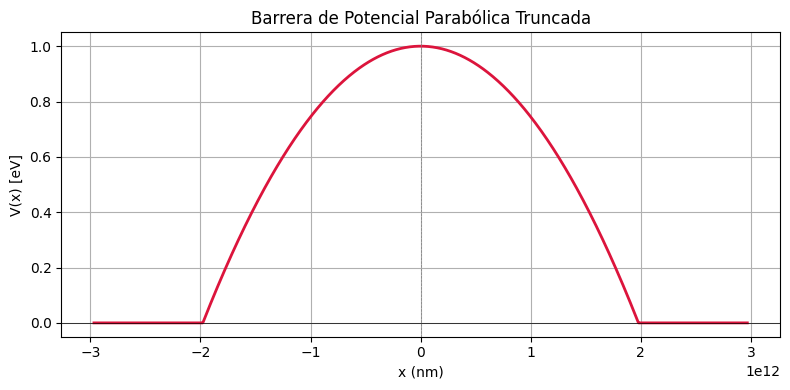

In [34]:
# Constantes físicas y parámetros de la barrera de potencial parabólica
V0 = 1 
E=0.5*V0             # Altura de la barrera (eV)
m = 511000       # Masa del electrón (eV)
Omega = 1e-6       # Frecuencia asociada (1 / nm)

# Calculamos el ancho máximo de la barrera
x_max = np.sqrt(2 * V0 / (m * Omega**2))

# Dominio de x más extendido para ver todo el perfil
x = np.linspace(-1.5 * x_max, 1.5 * x_max, 1000)

# Potencial parabólico truncado
V = np.where(np.abs(x) <= x_max, V0 - 0.5 * m * Omega**2 * x**2, 0)

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(x * 1e9, V, color='crimson', lw=2)
plt.title('Barrera de Potencial Parabólica Truncada')
plt.xlabel('x (nm)')
plt.ylabel('V(x) [eV]')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()

Figura 4: Representación gráfica del potencial Hill-Wheeler

Basado en los resultados presentados en los anexos, para el estado base, la función de onda es la siguiente:

$$
\psi_0(x) = \left( \frac{\alpha}{\pi} \right)^2 e^{-\alpha x^2/2}
$$

donde $\alpha = m \Omega /\hbar$

El tiempo de permanencia estaría dado por:

$$
\tau_d = \frac{m}{\hbar k}\int_B \psi_0(x) \psi_0^*(x) dx
$$

Donde B se encuentra en el rango 

$$
B = 
\begin{cases}
\sqrt{2(V_0 - E)/(m\Omega^2)} & \\
-\sqrt{2(V_0 - E)/(m\Omega^2)}
\end{cases}
$$

Del mismo modo, para obtener el tiempo de transmisión y reflexión se calculan mediante:

$$
\tau_t = \tau_d/T
$$

$$
\tau_r = \tau_d/R
$$

In [18]:
import sympy as sp

In [31]:
#Se definen las variables para calcular las integrales
x, alpha = sp.symbols('x a', real = True)

pi = sp.pi

psi = (alpha / pi)**(1/4)*sp.exp(-alpha * x**2 /2)
product = psi**2

Se hacen los cálculos primero para una energía fija 

In [32]:
#Se definen los límites de integració
superior_limit = np.sqrt(2 * V0 / (m * Omega**2))
inferior_limit = -np.sqrt(2 * V0 / (m * Omega**2))

integral = sp.integrate(product, (x, inferior_limit, superior_limit))

In [36]:
k = np.sqrt(2*m*(V0 - E))/hbar

alpha_values = np.arange(1e-7,1e-6,1e-5)
tau_d = [m/(hbar*k)*integral.subs(alpha, a) for a in alpha_values]

<h3>Barrera de potencial Morse </h3>

Se descrube mediante la ecuación

$$
V(x) = V_0 \left( e^{\frac{2x}{a}} - 2e^{\frac{x}{a}}\right)
$$

Se emplea para caracterizar la energía potencial de sistemas moleculares diatómicos.
Este potencial diverge en $\infty$ por su carácter exponencial, por lo que se prefiere emplear su versión modificada:

$$
V(x) = -V_0\left( e^{\frac{2x}{a}} - 2e^{\frac{x}{a}}\right)
$$

Para garantizar que la energía total E sea no negativa, se restringe su dominio de la forma:

$$
V(x)=
\begin{cases}
-V_0\left( e^{\frac{2x}{a}} - 2e^{\frac{x}{a}}\right), & x & \leq & a ln(2) & \\
0, & x & > & a ln(2)
\end{cases}
$$

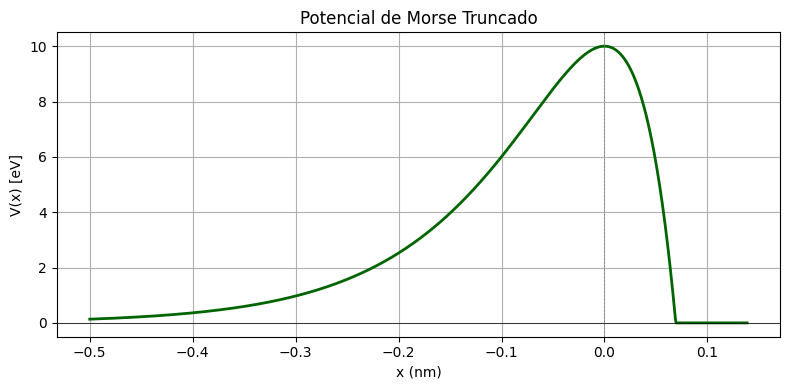

In [5]:
# Parámetros del potencial
V0 = 10     # Profundidad del pozo en eV
a = 0.1e-9  # Parámetro de escala (ancho) en metros

# Punto de corte del potencial
x_cut = a * np.log(2)

# Dominio en x (extendido un poco más a la izquierda para ver la forma completa)
x = np.linspace(-5*a, 2*x_cut, 1000)

# Potencial de Morse truncado
V = np.where(x <= x_cut, -V0 * (np.exp(2 * x / a) - 2 * np.exp(x / a)), 0)

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(x * 1e9, V, color='darkgreen', lw=2)
plt.title('Potencial de Morse Truncado')
plt.xlabel('x (nm)')
plt.ylabel('V(x) [eV]')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()


Figura 5. Representación gráfica de potencial de Morse modificado

<h3>Barrera de potencial Solitón (Eckart)</h3>

La ecuación de la barrera de potencial de Eckart es la siguiente:

$$
V(x) = V_0 sech^2 \left( \frac{x}{a} \right)
$$

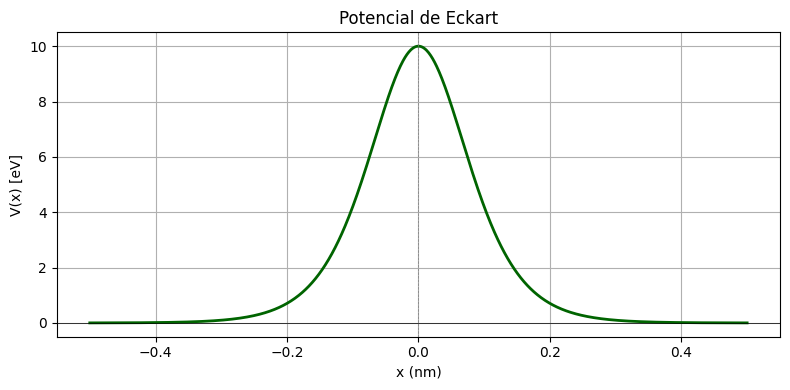

In [8]:
# Parámetros del potencial
V0 = 10     # Profundidad del pozo en eV
a = 0.1e-9  # Parámetro de escala (ancho) en metros

# Punto de corte del potencial
x_cut = a * np.log(2)

# Dominio en x (extendido un poco más a la izquierda para ver la forma completa)
x = np.linspace(-5*a, 5*a, 1000)

# Potencial de Morse truncado
V = V0 * 1/np.cosh(x / a)**2

# Gráfica
plt.figure(figsize=(8, 4))
plt.plot(x * 1e9, V, color='darkgreen', lw=2)
plt.title('Potencial de Eckart')
plt.xlabel('x (nm)')
plt.ylabel('V(x) [eV]')
plt.grid(True)
plt.axhline(0, color='black', lw=0.5)
plt.axvline(0, color='gray', linestyle='--', lw=0.5)
plt.tight_layout()
plt.show()

Figura 6: Representación de la barrera de potencial de Eckart

<h2>Referencias</h2>

[1] Mario Goto, Hiromi Iwamoto, Veríssimo M de Aquino, Valdir C Aguilera-Navarro, and Donald H
Kobe. Relationship between dwell, transmission and reflection tunnelling times. Journal of Physics
A: Mathematical and General, 37(11):3599, 2004.